## Download dataset

In [1]:
!gdown 1oGsM9EAFWiE28jDXT1IKhWwsqzIOcXcN

Downloading...
From: https://drive.google.com/uc?id=1oGsM9EAFWiE28jDXT1IKhWwsqzIOcXcN
To: /content/cleveland.csv
100% 10.9k/10.9k [00:00<00:00, 20.2MB/s]


## Data Analysis

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv('/content/cleveland.csv', header=None)

df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
df['target'] = df.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})
df['thal'] = df.thal.fillna(df.thal.mean())
df['ca'] = df.ca.fillna(df.ca.mean())

df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


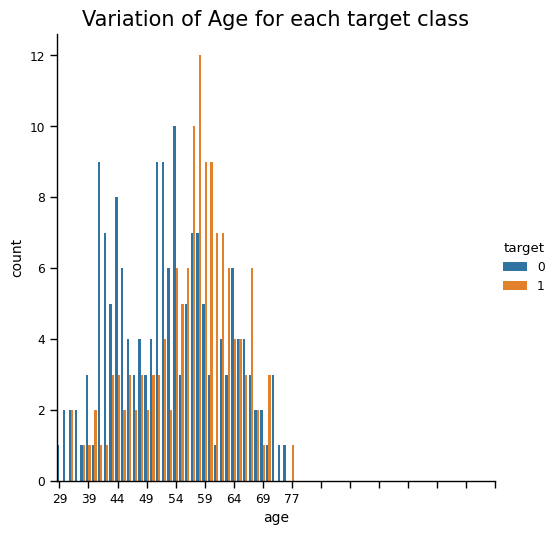

In [18]:
# Visualization between age and target
sns.set_context('paper', font_scale=1, rc={"font.size": 3, "axes.titlesize": 15, "axes.labelsize": 10})
ax = sns.catplot(kind='count', data=df, x='age', hue='target', order=df['age'].sort_values().unique())

ax.ax.set_xticks(np.arange(0, 80, 5))
plt.title('Variation of Age for each target class')
plt.show()

## Data Analysis

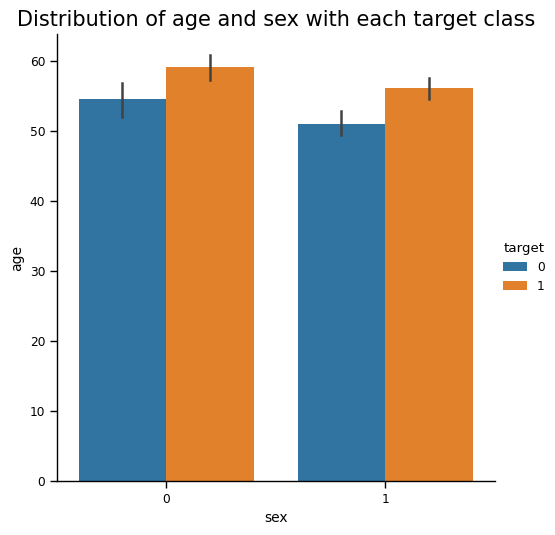

In [19]:
sns.catplot(kind='bar', data=df, x='sex', y='age', hue='target')
plt.title('Distribution of age and sex with each target class')
plt.show()

## KNN

In [38]:
# Split the data
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [34]:
# # Standardlization
# from sklearn.preprocessing import StandardScaler

# standard_scaler = StandardScaler()
# X_train = standard_scaler.fit_transform(X_train)
# X_test = standard_scaler.transform(X_test)

In [39]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski')

classifier.fit(X_train, Y_train)

Y_pred = classifier.predict(X_test)

In [40]:
from sklearn.metrics import confusion_matrix

confusion_mtx_test = confusion_matrix(Y_pred, Y_test)
confusion_mtx_train = confusion_matrix(classifier.predict(X_train), Y_train)

In [41]:
accuracy_train = np.round((confusion_mtx_train[0][0] + confusion_mtx_train[1][1]) / len(Y_train), 2)
accuracy_test = np.round((confusion_mtx_test[0][0] + confusion_mtx_test[1][1]) / len(Y_test), 2)

print(f'Accuracy for training set for KNeighborsClassifier: {accuracy_train}')
print(f'Accuracy for testing set for KNeighborsClassifier: {accuracy_test}')

Accuracy for training set for KNeighborsClassifier: 0.76
Accuracy for testing set for KNeighborsClassifier: 0.69


## SVM

In [42]:
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [45]:
from sklearn.svm import SVC

classifier = SVC(kernel='rbf', random_state=42)

classifier.fit(X_train, Y_train)

Y_pred = classifier.predict(X_test)

In [46]:
from sklearn.metrics import confusion_matrix

confusion_mtx_test = confusion_matrix(Y_pred, Y_test)
confusion_mtx_train = confusion_matrix(classifier.predict(X_train), Y_train)

In [48]:
accuracy_train = np.round((confusion_mtx_train[0][0] + confusion_mtx_train[1][1]) / len(Y_train), 2)
accuracy_test = np.round((confusion_mtx_test[0][0] + confusion_mtx_test[1][1]) / len(Y_test), 2)

print(f'Accuracy for training set for Super Vector Classifier: {accuracy_train}')
print(f'Accuracy for testing set for Super Vector Classifier: {accuracy_test}')

Accuracy for training set for Super Vector Classifier: 0.66
Accuracy for testing set for Super Vector Classifier: 0.67


## Naive Bayes

In [49]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(X_train, Y_train)

Y_pred = classifier.predict(X_test)

In [50]:
from sklearn.metrics import confusion_matrix

confusion_mtx_test = confusion_matrix(Y_pred, Y_test)
confusion_mtx_train = confusion_matrix(classifier.predict(X_train), Y_train)

In [51]:
accuracy_train = np.round((confusion_mtx_train[0][0] + confusion_mtx_train[1][1]) / len(Y_train), 2)
accuracy_test = np.round((confusion_mtx_test[0][0] + confusion_mtx_test[1][1]) / len(Y_test), 2)

print(f'Accuracy for training set for Naive Bayes: {accuracy_train}')
print(f'Accuracy for testing set for Naive Bayes: {accuracy_test}')

Accuracy for training set for Naive Bayes: 0.85
Accuracy for testing set for Naive Bayes: 0.84


## Decision Tree

In [52]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_split=2, random_state=42)
classifier.fit(X_train, Y_train)

Y_pred = classifier.predict(X_test)

In [53]:
from sklearn.metrics import confusion_matrix

confusion_mtx_test = confusion_matrix(Y_pred, Y_test)
confusion_mtx_train = confusion_matrix(classifier.predict(X_train), Y_train)

In [54]:
accuracy_train = np.round((confusion_mtx_train[0][0] + confusion_mtx_train[1][1]) / len(Y_train), 2)
accuracy_test = np.round((confusion_mtx_test[0][0] + confusion_mtx_test[1][1]) / len(Y_test), 2)

print(f'Accuracy for training set for Naive Bayes: {accuracy_train}')
print(f'Accuracy for testing set for Naive Bayes: {accuracy_test}')

Accuracy for training set for Naive Bayes: 1.0
Accuracy for testing set for Naive Bayes: 0.75


## Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(criterion='gini', max_depth=10, min_samples_split=2, n_estimators = 10, random_state=42)
classifier.fit(X_train, Y_train)

Y_pred = classifier.predict(X_test)

In [56]:
from sklearn.metrics import confusion_matrix

confusion_mtx_test = confusion_matrix(Y_pred, Y_test)
confusion_mtx_train = confusion_matrix(classifier.predict(X_train), Y_train)

In [57]:
accuracy_train = np.round((confusion_mtx_train[0][0] + confusion_mtx_train[1][1]) / len(Y_train), 2)
accuracy_test = np.round((confusion_mtx_test[0][0] + confusion_mtx_test[1][1]) / len(Y_test), 2)

print(f'Accuracy for training set for Naive Bayes: {accuracy_train}')
print(f'Accuracy for testing set for Naive Bayes: {accuracy_test}')

Accuracy for training set for Naive Bayes: 0.98
Accuracy for testing set for Naive Bayes: 0.8


## AdaBoost

In [58]:
from sklearn.ensemble import AdaBoostClassifier

classifier = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=42)
classifier.fit(X_train, Y_train)

Y_pred = classifier.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [59]:
from sklearn.metrics import confusion_matrix

confusion_mtx_test = confusion_matrix(Y_pred, Y_test)
confusion_mtx_train = confusion_matrix(classifier.predict(X_train), Y_train)

In [60]:
accuracy_train = np.round((confusion_mtx_train[0][0] + confusion_mtx_train[1][1]) / len(Y_train), 2)
accuracy_test = np.round((confusion_mtx_test[0][0] + confusion_mtx_test[1][1]) / len(Y_test), 2)

print(f'Accuracy for training set for Naive Bayes: {accuracy_train}')
print(f'Accuracy for testing set for Naive Bayes: {accuracy_test}')

Accuracy for training set for Naive Bayes: 0.91
Accuracy for testing set for Naive Bayes: 0.84


## Gradient Boost

In [62]:
from sklearn.ensemble import GradientBoostingClassifier

classifier = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, subsample=1.0, min_samples_split=2, max_depth=3, random_state=42)

classifier.fit(X_train, Y_train)

Y_pred = classifier.predict(X_test)

In [63]:
from sklearn.metrics import confusion_matrix

confusion_mtx_test = confusion_matrix(Y_pred, Y_test)
confusion_mtx_train = confusion_matrix(classifier.predict(X_train), Y_train)

In [64]:
accuracy_train = np.round((confusion_mtx_train[0][0] + confusion_mtx_train[1][1]) / len(Y_train), 2)
accuracy_test = np.round((confusion_mtx_test[0][0] + confusion_mtx_test[1][1]) / len(Y_test), 2)

print(f'Accuracy for training set for Naive Bayes: {accuracy_train}')
print(f'Accuracy for testing set for Naive Bayes: {accuracy_test}')

Accuracy for training set for Naive Bayes: 1.0
Accuracy for testing set for Naive Bayes: 0.85


## XGBoost

In [66]:
from xgboost import XGBClassifier

xg = XGBClassifier(objective="binary:logistic", random_state=42, n_estimators = 100)
xg.fit(X_train, Y_train)

Y_pred = xg.predict(X_test)

In [67]:
from sklearn.metrics import confusion_matrix

confusion_mtx_test = confusion_matrix(Y_pred, Y_test)
confusion_mtx_train = confusion_matrix(classifier.predict(X_train), Y_train)

In [68]:
accuracy_train = np.round((confusion_mtx_train[0][0] + confusion_mtx_train[1][1]) / len(Y_train), 2)
accuracy_test = np.round((confusion_mtx_test[0][0] + confusion_mtx_test[1][1]) / len(Y_test), 2)

print(f'Accuracy for training set for Naive Bayes: {accuracy_train}')
print(f'Accuracy for testing set for Naive Bayes: {accuracy_test}')

Accuracy for training set for Naive Bayes: 1.0
Accuracy for testing set for Naive Bayes: 0.87


## Stacking

In [78]:
decision_tree_classifier = DecisionTreeClassifier(random_state=42)
random_forest_classifier = RandomForestClassifier(random_state=42)
knn = KNeighborsClassifier()
xgb = XGBClassifier(XGBClassifier)
gradient_boosting_clasifier = GradientBoostingClassifier(random_state=42)
svc = SVC(kernel='rbf', random_state=42)
ada_boost_classifier = AdaBoostClassifier(random_state=42)

clf = [('dtc', decision_tree_classifier),('rfc', random_forest_classifier),('knn', knn), ('gc', gradient_boosting_clasifier), ('ad',ada_boost_classifier), ('svc', svc)]

In [79]:
from sklearn.ensemble import StackingClassifier

xgb = XGBClassifier()
classifier = StackingClassifier(estimators=clf, final_estimator=xgb)

classifier.fit(X_train, Y_train)

Y_pred = classifier.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

In [80]:
from sklearn.metrics import confusion_matrix

confusion_mtx_test = confusion_matrix(Y_pred, Y_test)
confusion_mtx_train = confusion_matrix(classifier.predict(X_train), Y_train)

In [81]:
accuracy_train = np.round((confusion_mtx_train[0][0] + confusion_mtx_train[1][1]) / len(Y_train), 2)
accuracy_test = np.round((confusion_mtx_test[0][0] + confusion_mtx_test[1][1]) / len(Y_test), 2)

print(f'Accuracy for training set for Naive Bayes: {accuracy_train}')
print(f'Accuracy for testing set for Naive Bayes: {accuracy_test}')

Accuracy for training set for Naive Bayes: 0.92
Accuracy for testing set for Naive Bayes: 0.9
